In [1]:
import numpy as np
import pandas as pd

In [8]:
import chardet
with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [7]:
df = pd.read_csv('spam.csv',encoding = 'Windows-1252')
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2736,ham,Really? I crashed out cuddled on my sofa.,NaN,NaN,NaN
1174,ham,Yay! You better not have told that to 5 other ...,NaN,NaN,NaN
5281,ham,"And how you will do that, princess? :)",NaN,NaN,NaN
1499,spam,"SMS. ac JSco: Energy is high, but u may not kn...",NaN,NaN,NaN
1050,ham,Are you available for soiree on June 3rd?,NaN,NaN,NaN
3522,ham,Try neva mate!!,NaN,NaN,NaN
2589,spam,Join the UK's horniest Dogging service and u c...,NaN,NaN,NaN
5468,spam,URGENT! Last weekend's draw shows that you hav...,NaN,NaN,NaN
3786,ham,WHORE YOU ARE UNBELIEVABLE.,NaN,NaN,NaN
1070,ham,"alright, I'll make sure the car is back tonight",NaN,NaN,NaN


In [9]:
# Data cleaning
# EDA
# Text processing
# Model Building
# Evaluation
# Improvement

# Data cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# Dropping columns 
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [12]:
df.sample(10)

,v1,v2
5492,spam,Marvel Mobile Play the official Ultimate Spide...
3882,ham,Gumby's has a special where a &lt;#&gt; \ che...
128,ham,HEY GIRL. HOW R U? HOPE U R WELL ME AN DEL R B...
2585,ham,I will be outside office take all from there
2820,ham,Oh god..taken the teeth?is it paining
1238,ham,"Dear relieved of westonzoyland, all going to p..."
3999,spam,This is the 2nd time we have tried to contact ...
2209,ham,"Hmm well, night night"
5088,ham,I wont do anything de.
1311,ham,U r too much close to my heart. If u go away i...


In [14]:
df.rename(columns = {'v1':'Target','v2':'Text'}, inplace =True)

In [15]:
df.sample(10)

,Target,Text
3161,ham,I can't describe how lucky you are that I'm ac...
150,ham,The wine is flowing and i'm i have nevering..
303,ham,He is a womdarfull actor
4165,ham,Well if I'm that desperate I'll just call arma...
4359,ham,"Night sweet, sleep well! I've just been to see..."
2637,ham,No I don't have cancer. Moms making a big deal...
4546,ham,Hey mate. Spoke to the mag people. We‰Û÷re on....
2678,ham,Was playng 9 doors game and gt racing on phone...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
1635,ham,You have come into my life and brought the sun...


In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])

In [24]:
df.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [23]:
# The encoder has assigned spam as 1 and ham(not spam) as 0

In [29]:
#checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [31]:
#Check for duplicate values
df.duplicated().sum()

403

In [38]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [39]:
df.shape
df.duplicated().sum()

0

# Exploratory data analysis

In [40]:
import matplotlib.pyplot as plt

In [44]:
counts = df['Target'].value_counts()

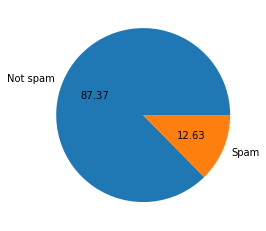

In [47]:
plt.pie(counts, labels = ['Not spam','Spam'],autopct = "%0.2f")
plt.show()

In [ ]:
!